<a href="https://colab.research.google.com/github/OzUygur/Data-Science-Project-House-Price-Prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction Project
This notebook demonstrates how to predict house prices using Linear Regression, Machine Learning (Random Forest), and Deep Learning (Neural Network) approaches.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

sns.set(style='whitegrid')

## 1. Load and Explore Dataset

In [21]:
# For demonstration, use a public dataset
# You can replace this with your own CSV file
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2. Data Preprocessing & Feature Engineering

In [3]:
# Handle missing values
df = df.dropna()

# Encode categorical features
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Separate features and target variable
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
import numpy as np

# 1. Add bias (intercept) to X
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# 2. Initialize parameters
n_features = X_train_bias.shape[1]
theta = np.zeros(n_features)  # weights initialized to zero

# 3. Set hyperparameters
learning_rate = 0.01
epochs = 1000
m = len(y_train)

# 4. Gradient Descent loop
for epoch in range(epochs):
    predictions = X_train_bias.dot(theta)
    errors = predictions - y_train
    gradients = (2/m) * X_train_bias.T.dot(errors)
    theta -= learning_rate * gradients

# 5. Make predictions on test set
y_pred = X_test_bias.dot(theta)

# 6. Evaluate the model
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

print(f"Linear Regression (Gradient Descent) RMSE: {rmse:.2f}")
print(f"Linear Regression (Gradient Descent) R² Score: {r2:.4f}")


Linear Regression (Gradient Descent) RMSE: 69728.93
Linear Regression (Gradient Descent) R² Score: 0.6445


## 3. Linear Regression Model

In [24]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('Linear Regression R2:', r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 69297.7166911303
Linear Regression R2: 0.6488402154431994


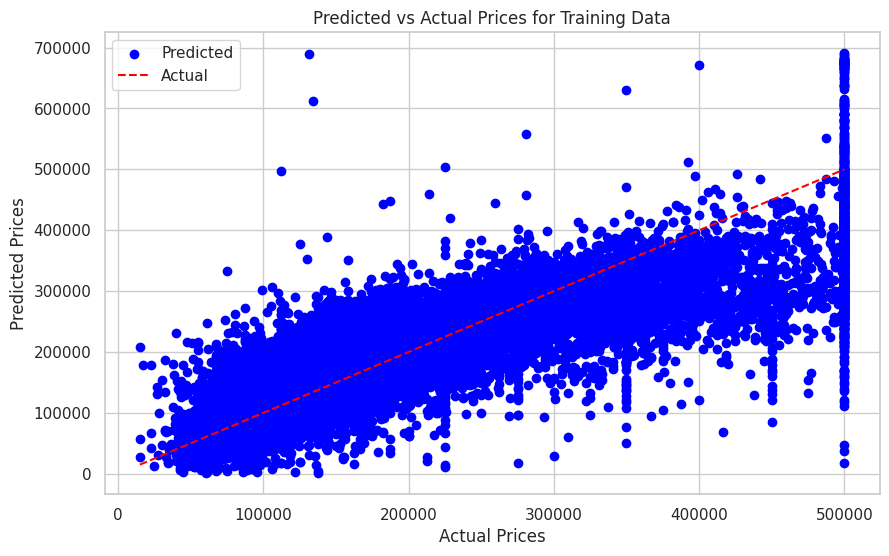

In [10]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual prices for the training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, abs(lr.predict(X_train_scaled)), color='blue', label='Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices for Training Data')
plt.legend()
plt.show()

## 4. Random Forest Regressor (ML Model)

In [5]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print('Random Forest RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('Random Forest R2:', r2_score(y_test, y_pred_rf))

Random Forest RMSE: 48777.78774573444
Random Forest R2: 0.826015274343193


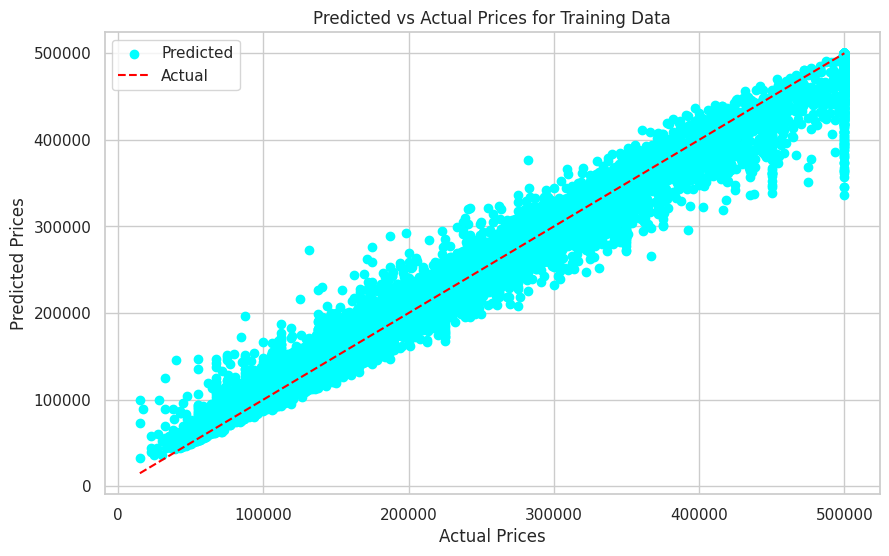

In [15]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual prices for the training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, abs(rf.predict(X_train_scaled)), color='aqua', label='Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices for Training Data')
plt.legend()
plt.show()

## 5. Deep Learning Model (Neural Network)

In [17]:
dl = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

dl.compile(optimizer='adam', loss='mse')
history = dl.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate model
y_pred_dl = dl.predict(X_test_scaled).flatten()
print('Deep Learning RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_dl)))
print('Deep Learning R2:', r2_score(y_test, y_pred_dl))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Deep Learning RMSE: 69469.21845822246
Deep Learning R2: 0.6470999258657222


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


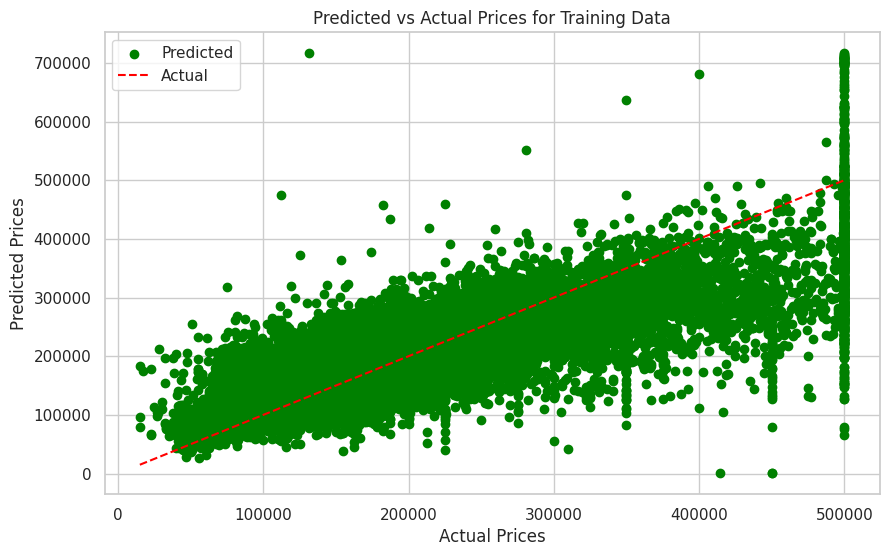

In [19]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual prices for the training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, abs(dl.predict(X_train_scaled)), color='green', label='Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices for Training Data')
plt.legend()
plt.show()

## 6. Model Comparison

/tmp/ipython-input-2944765934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Model', y='RMSE', palette='Set2')


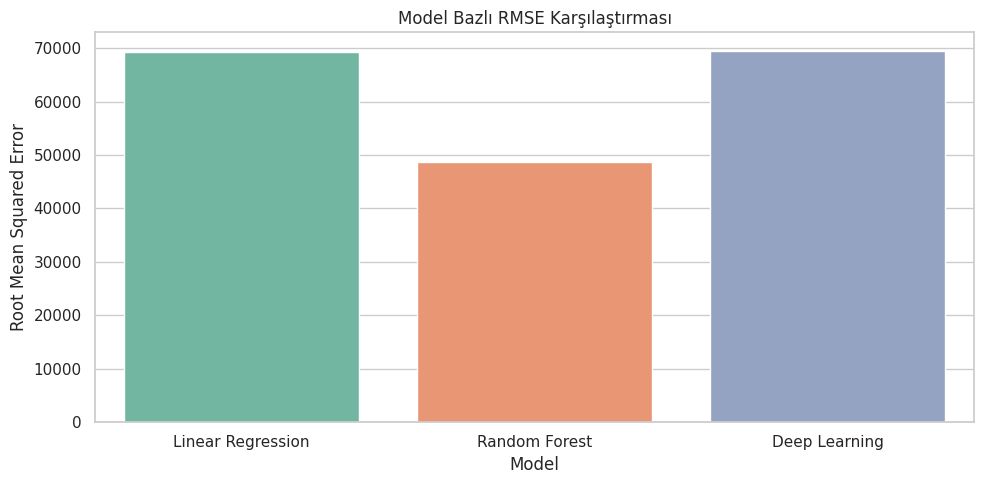

/tmp/ipython-input-2944765934.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Model', y='R2 Score', palette='Set1')


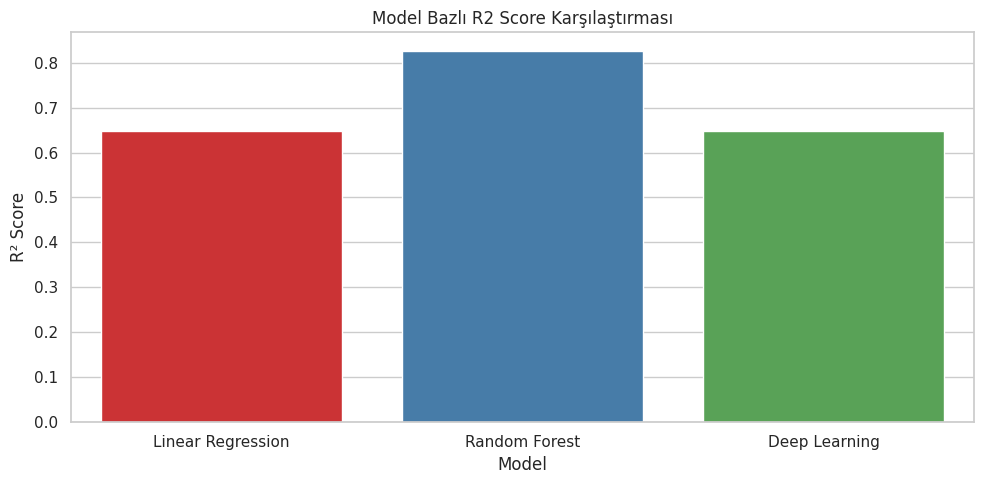

In [22]:
# RMSE Karşılaştırması
plt.figure(figsize=(10, 5))
sns.barplot(data=results, x='Model', y='RMSE', palette='Set2')
plt.title('Model Bazlı RMSE Karşılaştırması')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# R2 Score Karşılaştırması
plt.figure(figsize=(10, 5))
sns.barplot(data=results, x='Model', y='R2 Score', palette='Set1')
plt.title('Model Bazlı R2 Score Karşılaştırması')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


In [25]:
# 1. Find the best model based on highest R² Score
best_model_index = results['R2 Score'].idxmax()
best_model_name = results.loc[best_model_index, 'Model']

print(f"\n✅ En iyi model: {best_model_name}")

# 2. Predict actual house price using the best model
if best_model_name == 'Linear Regression':
    final_predictions = y_pred_lr
elif best_model_name == 'Random Forest':
    final_predictions = y_pred_rf
else:  # Deep Learning
    final_predictions = y_pred_dl

# 3. Show sample predictions
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values[:10],
    'Predicted Price': final_predictions[:10]
})
print("\n🎯 Örnek Gerçek ve Tahmin Edilen Ev Fiyatları:")
print(comparison_df)



✅ En iyi model: Random Forest

🎯 Örnek Gerçek ve Tahmin Edilen Ev Fiyatları:
   Actual Price  Predicted Price
0      245800.0        218806.00
1      137900.0        151202.00
2      218200.0        190018.00
3      220800.0        146361.00
4      170500.0        168285.00
5       75000.0         74389.00
6      269400.0        287635.00
7      228900.0        212269.00
8      500001.0        466111.56
9       80800.0         69794.00


In [26]:
# Best model'e göre doğru tahminler alınmıştı, örn: final_predictions

# Tahmin sonuçlarını orijinal test verisi ile birleştir
prediction_table = X_test.copy()
prediction_table['Actual Price'] = y_test
prediction_table['Predicted Price'] = final_predictions

# İlk 10 satırı görüntüle
prediction_table.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,Actual Price,Predicted Price
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,False,False,False,True,245800.0,218806.00
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,True,False,False,False,137900.0,151202.00
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,False,False,False,False,218200.0,190018.00
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,False,False,True,False,220800.0,146361.00
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,True,False,False,False,170500.0,168285.00
16260,-121.25,37.97,41.0,855.0,189.0,716.0,206.0,2.0375,True,False,False,False,75000.0,74389.00
18011,-121.98,37.27,25.0,3075.0,564.0,1633.0,543.0,5.2528,False,False,False,False,269400.0,287635.00
10086,-117.96,33.94,34.0,2228.0,399.0,1159.0,378.0,4.8906,False,False,False,False,228900.0,212269.00
18294,-122.10,37.39,35.0,2471.0,349.0,881.0,342.0,7.6229,False,False,True,False,500001.0,466111.56
18733,-122.39,40.53,28.0,1427.0,304.0,692.0,285.0,2.1250,True,False,False,False,80800.0,69794.00


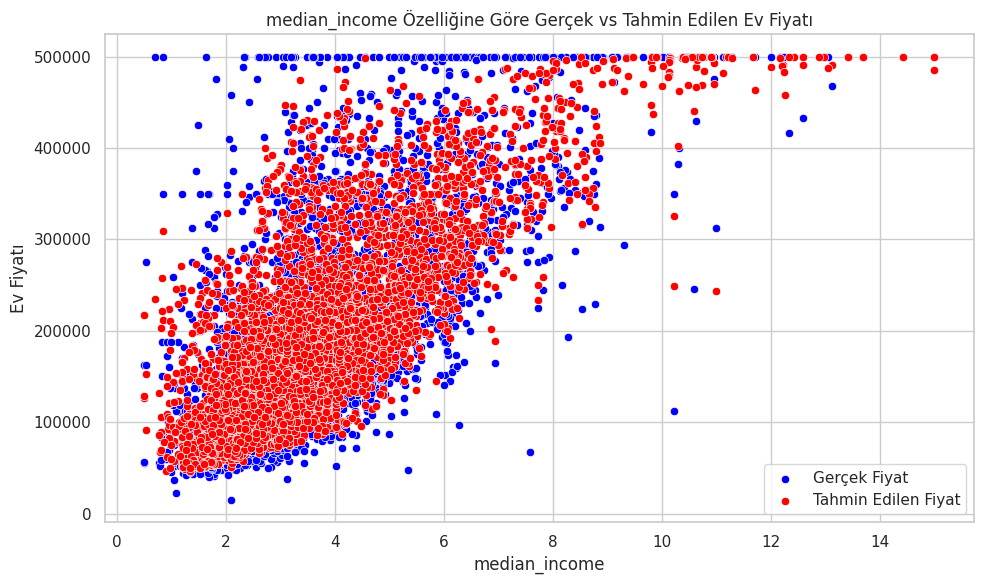

In [27]:
# Özelliğe göre çizim
plt.figure(figsize=(10, 6))
sns.scatterplot(data=prediction_table, x='median_income', y='Actual Price', label='Gerçek Fiyat', color='blue')
sns.scatterplot(data=prediction_table, x='median_income', y='Predicted Price', label='Tahmin Edilen Fiyat', color='red')
plt.title('median_income Özelliğine Göre Gerçek vs Tahmin Edilen Ev Fiyatı')
plt.xlabel('median_income')
plt.ylabel('Ev Fiyatı')
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-537858626.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


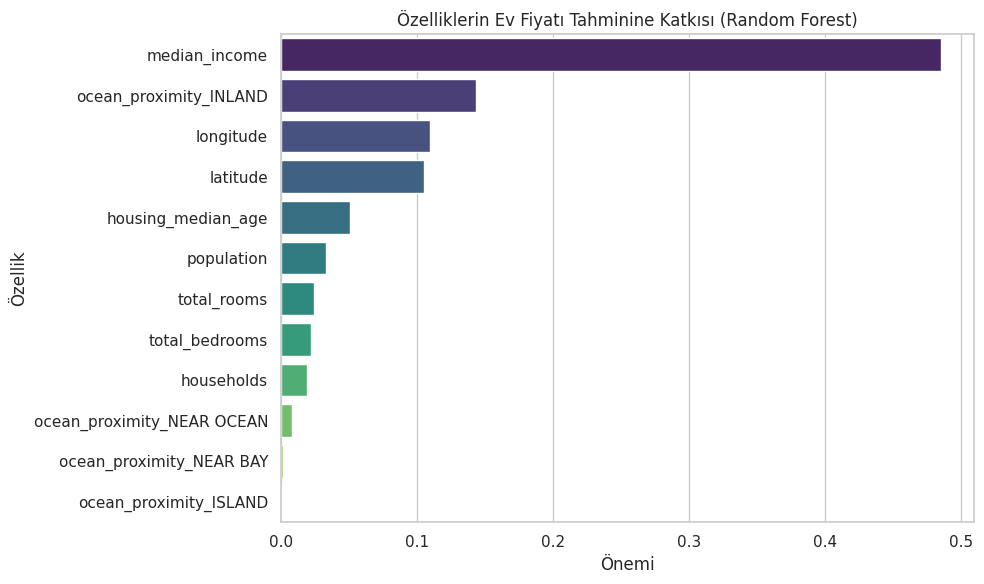

In [28]:
# Özellik önemlerini görselleştir (sadece Random Forest modeli için)
importances = rf.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Çizim
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Özelliklerin Ev Fiyatı Tahminine Katkısı (Random Forest)')
plt.xlabel('Önemi')
plt.ylabel('Özellik')
plt.tight_layout()
plt.show()


## 7. Conclusion
This notebook compared Linear Regression, Random Forest, and Deep Learning models for house price prediction. You can further tune hyperparameters, engineer features, or try more advanced ML/DL models for better performance.